In [46]:
import numpy as np
from matplotlib import pyplot as plt
from functools import partial
%matplotlib inline
from IPython.display import HTML
from matplotlib import animation

# Função

$$f(x) = \frac{1}{x}$$

In [13]:
f = lambda x: 1 / x

In [14]:
x = np.linspace(0, 1, 100)[1:] # remove o 0

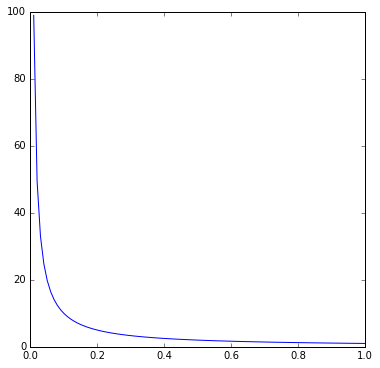

In [15]:
fig = plt.figure(figsize=(6, 6))
plt.plot(x, f(x))

# Derivada

$$f^{'}(x) = -\frac{1}{x^2}$$

# Função da reta tangente ao ponto (x0, y0)

$$y - y_0 = -\frac{1}{x_0^2}(x - x_0)$$
$$y = -\frac{1}{x_0^2}(x - x_0) + \frac{1}{x_0}$$

In [16]:
f_tan_x0 = lambda x, x0: -1*(1 / x0**2)*(x - x0) + 1 / x0

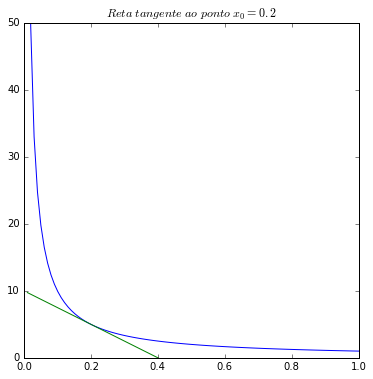

In [17]:
fig = plt.figure(figsize=(6, 6))
plt.plot(x, f(x))
plt.plot(x, f_tan_x0(x, .2))
plt.ylim([0, 50])
plt.title("$Reta\ tangente\ ao\ ponto\ x_0 = 0.2$")

# Retas tangentes a vários pontos

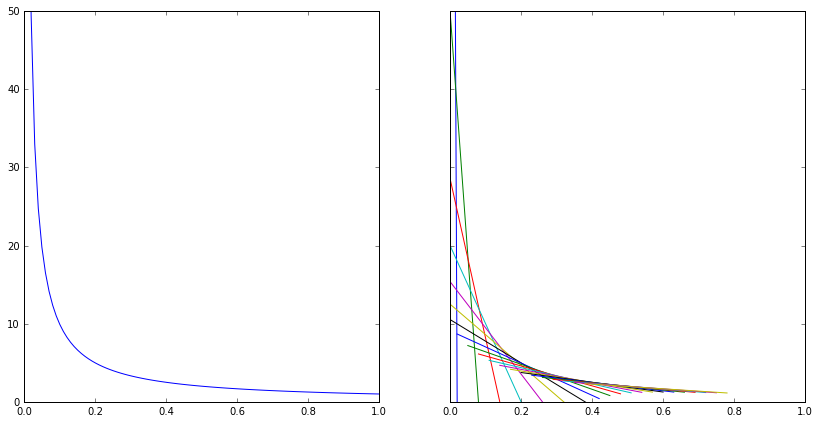

In [18]:
x0s = np.arange(.01, .6, .03)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14, 7))

plt.ylim([0, 50])
plt.xlim([0, 1])

ax1.plot(x, f(x))

for x0 in x0s:
    
    x_ = np.linspace(x0 - .2, x0 + .2, 10)
    ax2.plot(x_, f_tan_x0(x_, x0))

# Função

$$f(x) = x^n$$

In [19]:
f_n = lambda x, n: x**n

In [20]:
x = np.linspace(-5, 5, 200)

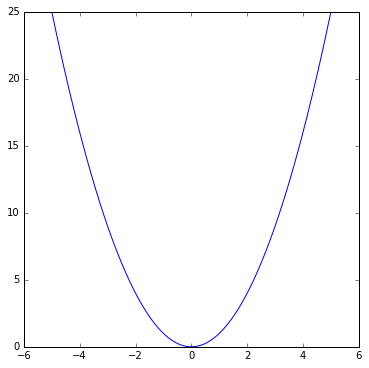

In [21]:
fig = plt.figure(figsize=(6, 6))

plt.plot(x, f_n(x, 2))

# Derivada

$$f^{'}(x) = nx^{n-1}$$

# Função da reta tangente ao ponto (x0, y0)

$$y - y0 = nx_0^{n-1}(x - x_0)$$
$$y = nx_0^{n-1}(x - x_0) + x_0^{n}$$

In [22]:
f_n_tan_x0 = lambda x, x0, n: n * (x0 ** (n - 1)) * (x - x0) + x0 ** n 

## n = 3, x0 = 1

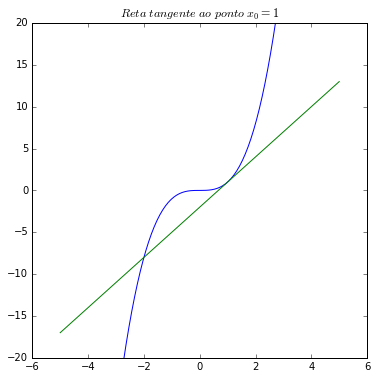

In [23]:
fig = plt.figure(figsize=(6, 6))
plt.plot(x, f_n(x, n=3))
plt.plot(x, f_n_tan_x0(x, x0=1, n=3))
plt.ylim([-20, 20])
plt.title("$Reta\ tangente\ ao\ ponto\ x_0 = 1$")

# Retas tangentes a vários pontos

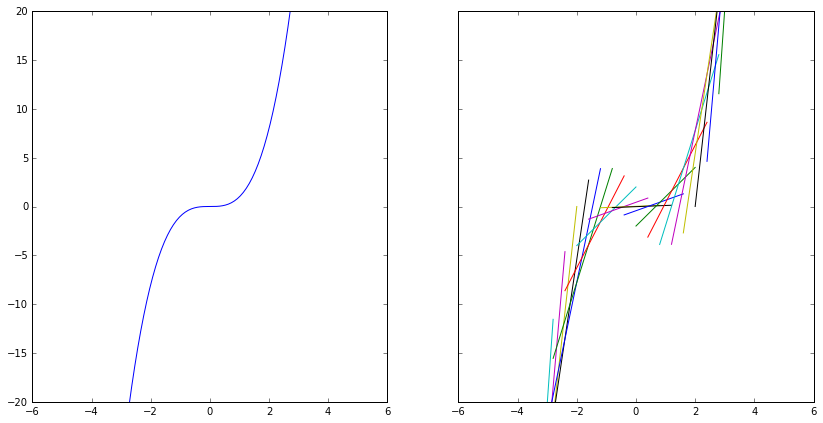

In [24]:
x0s = np.arange(-5, 5, .4)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14, 7))

plt.ylim([-20, 20])

ax1.plot(x, f_n(x, n=3))

for x0 in x0s:
    
    x_ = np.linspace(x0 - 1, x0 + 1, 20)
    ax2.plot(x_, f_n_tan_x0(x_, x0, n=3))

# Generalizando

In [25]:
def plot_derivative(f, fd, xlim, ylim, n_retas, **fparams):
    
    x = np.linspace(xlim[0], xlim[1], 100)
    x0s = np.linspace(xlim[0], xlim[1], n_retas)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(14, 7))
    
    plt.ylim(ylim)
    
    ax1.plot(x, f(x, **fparams))
    
    a_ = (xlim[1] - xlim[0]) / 10
    
    for x0 in x0s:
        
        x_ = np.linspace(x0 - a_, x0 + a_, 20)
        ax2.plot(x_, fd(x_, x0, **fparams))

$$f(x) = 2x^2 + 4x + 3$$
$$fd(x, x0) = -4x_0^2 + 4x + 6x_0x + 3$$

In [26]:
f = lambda x: 2*x**2 + 4*x + 3
fd = lambda x, x0: -4*x0**2 + 4*x + 6*x0*x + 3

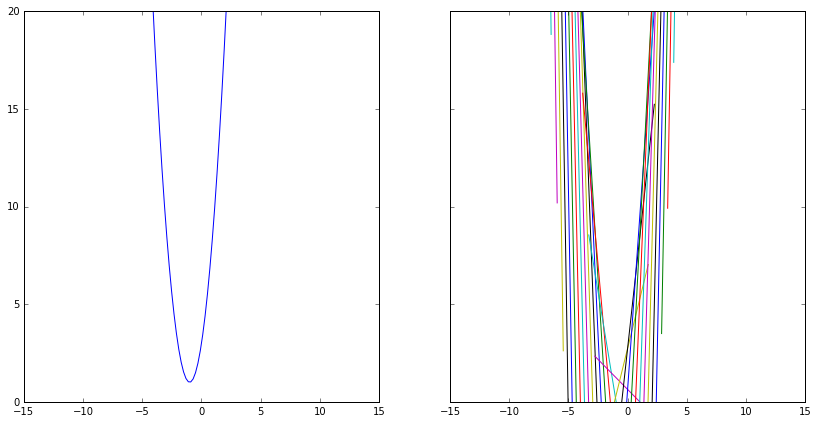

In [27]:
plot_derivative(f, fd, xlim=(-10, 10), ylim=(0, 20), n_retas=40)

$$f(x) = \frac{1}{x}$$
$$fd(x, x0) = \frac{2x_0 - x}{x_0^2}$$

In [28]:
f = lambda x: 1 / x
fd = lambda x, x0: (2*x0 - x) / x0**2

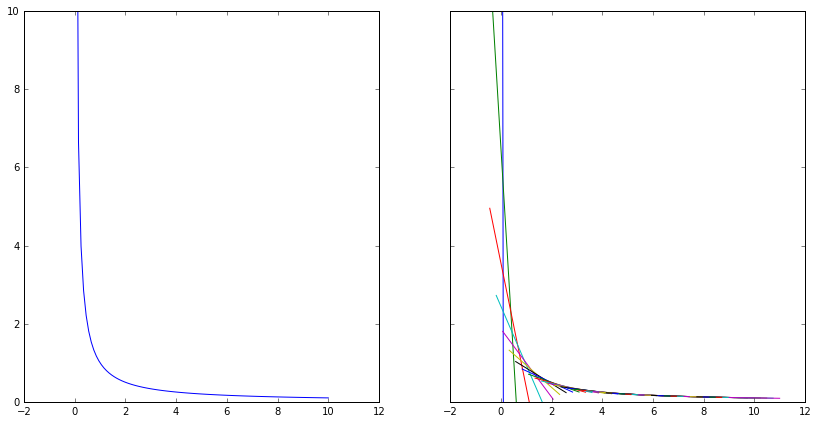

In [29]:
plot_derivative(f, fd, xlim=(.05, 10), ylim=(0, 10), n_retas=40)

$$f(x) = sen(x)$$
$$fd(x, x0) = sen(x_0) + cos(x_0)(x - x_0)$$

In [30]:
f = lambda x: np.sin(x)
fd = lambda x, x0: np.sin(x0) + np.cos(x0) * (x - x0)

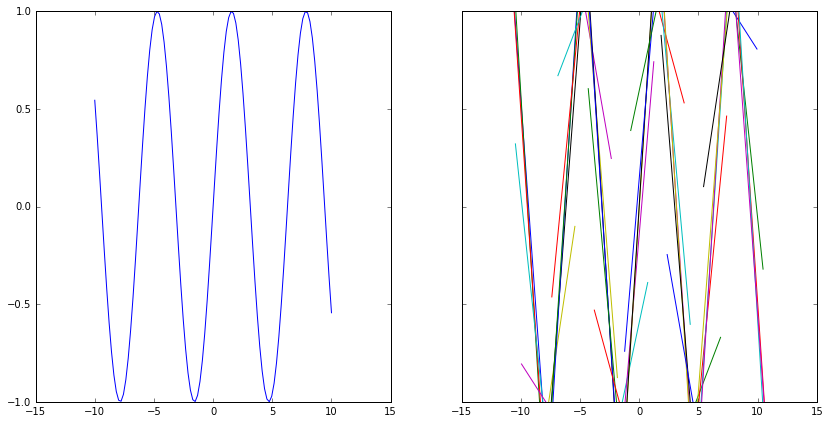

In [31]:
plot_derivative(f, fd, xlim=(-10, 10), ylim=(-1, 1), n_retas=40)

$$f(x) = e^x$$
$$fd(x, x0) = e^x(x - x_0) + e^{x_0}$$

In [32]:
f = lambda x: np.exp(x)
fd = lambda x, x0: np.exp(x0) * (x - x0) + np.exp(x0)

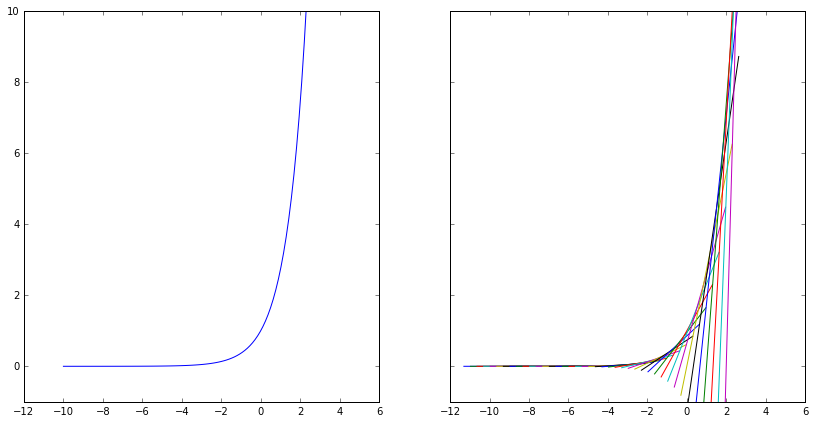

In [33]:
plot_derivative(f, fd, xlim=(-10, 3), ylim=(-1, 10), n_retas=40)

$$f(x) = ln(x)$$
$$fd(x, x0) = \frac{1}{x_0}(x - x_0) + ln(x_0)$$

In [34]:
f = lambda x: np.log(x)
fd = lambda x, x0: (1 / x0)*(x - x0) + np.log(x0)

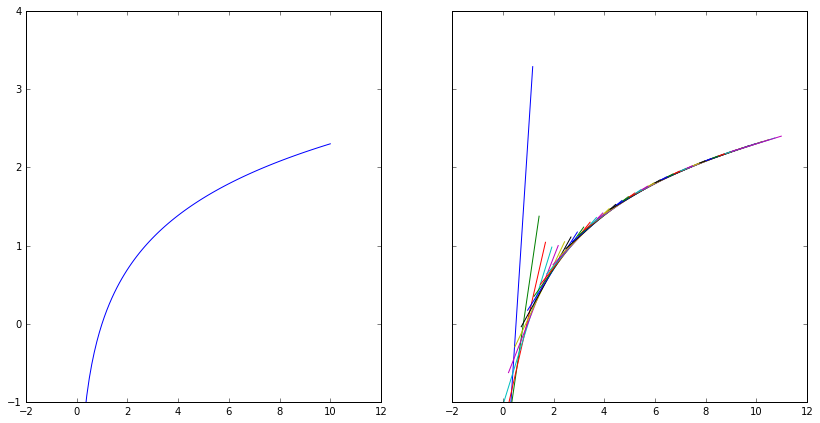

In [35]:
plot_derivative(f, fd, xlim=(.2, 10), ylim=(-1, 4), n_retas=40)

$$f(x) = a^x$$
$$fd(x, x0) = a^xln(a)(x - x_0) + a^{x_0}$$

In [36]:
# a = 2
f = lambda x: 2**x
fd = lambda x, x0: 2**x0 * np.log(2) * (x - x0) + 2**x0

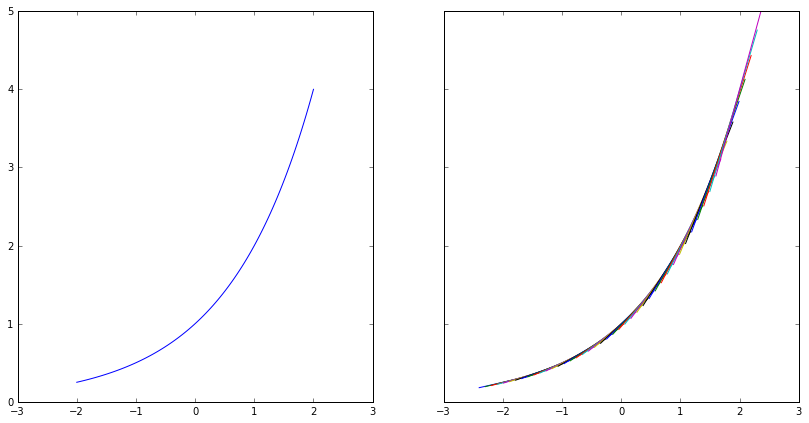

In [37]:
plot_derivative(f, fd, xlim=(-2, 2), ylim=(0, 5), n_retas=40)

# Animando

In [38]:
def scale(fromlim, tolim):
    
    A, B = fromlim
    C, D = tolim
    
    return lambda x: C*(1 - (x - A)/(B - A)) + D*((x - A) / (B - A))

In [39]:
def animate(fd, xlim, ylim, frames=20, line_len=.1):
    
    fig, ax = plt.subplots()

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    x = np.linspace(xlim[0], xlim[1], 100)

    line, = ax.plot([], [])
    
    scale_ = scale((0, frames - 1), xlim)
    
    def init():
    
        line.set_data([], [])

        return (line,)
    
    def animate(i):
    
        x0 = scale_(i)
        x_ = np.linspace(x0 - line_len, x0 + line_len, 20)
        y = fd(x_, x0)
        line.set_data(x_, y)
        return (line, )
    
    anim = animation.FuncAnimation(fig, animate, init_func=init, frames=frames, interval = 100, blit=True)
    
    return anim

$$f(x) = sen(x)$$
$$fd(x, x0) = sen(x_0) + cos(x_0)(x - x_0)$$

In [40]:
f = lambda x: np.sin(x)
fd = lambda x, x0: np.sin(x0) + np.cos(x0) * (x - x0)

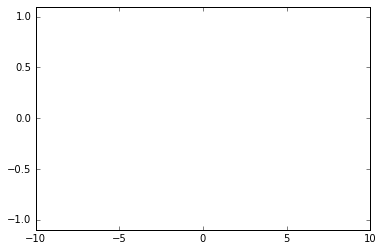

In [41]:
anim = animate(fd, xlim=(-10, 10), ylim=(-1.1, 1.1), frames=100, line_len=.2)

In [42]:
HTML(anim.to_html5_video())

$$f(x) = \frac{1}{x}$$
$$fd(x, x0) = \frac{2x_0 - x}{x_0^2}$$

In [43]:
f = lambda x: 1 / x
fd = lambda x, x0: (2*x0 - x) / x0**2

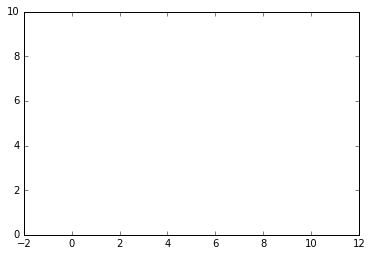

In [44]:
anim = animate(fd, xlim=(-2, 12), ylim=(0, 10), frames=100, line_len=.4)

In [45]:
HTML(anim.to_html5_video())

# Polinômio do 2º grau

In [47]:
poli2 = lambda a, b, c: lambda x: a*x**2 + b*x + c

In [59]:
f = poli2(1, 0, 10)

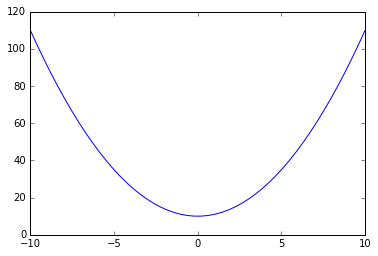

In [60]:
x = np.linspace(-10, 10)
y = f(x)
plt.plot(x, y)

In [70]:
def plot_inflex_tan(a, b, c):
    
    f = poli2(a, b, c)
    
    x_inflex = -1*b/(2*a)
    
    x = np.linspace(x_inflex - 5, x_inflex + 5, 100)
    y = f(x)
    y_ = -1*((b**2 - 4*a*c) / (4*a)) * np.ones_like(x)
    
    min_y = np.min(y)
    max_y = np.max(y)
    ran_y = max_y - min_y
    
    plt.ylim(min_y - ran_y*.1, max_y + ran_y*.1)
    plt.plot(x, y)
    plt.plot(x, y_)

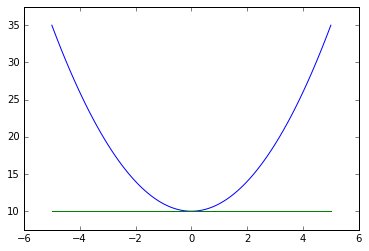

In [71]:
plot_inflex_tan(1, 0, 10)

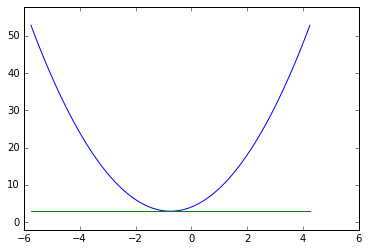

In [72]:
plot_inflex_tan(2, 3, 4)

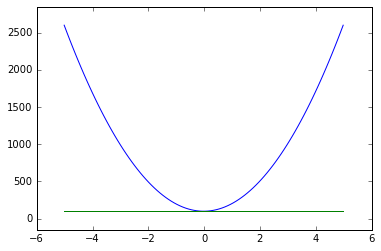

In [73]:
plot_inflex_tan(100, 3, 100)